In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import csv
from scipy.stats import chisquare
from scipy.stats import t
import seaborn as sns
import pandas as pd

# Distribution

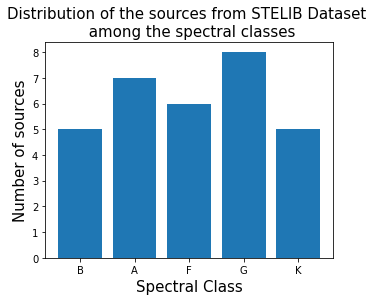

In [2]:
data = {"HD002857_V3.2": "A2IV","HD032537_V3.2": "F0V", "HD034411_V3.2": "G0V", "HD035497_V3.2": "B7III", "HD041593_V3.2": "K0V", "HD061064_V3.2": "F6III", "HD063077_V3.2": "G0V", "HD065583_V3.2": "G8V", "HD067767_V3.2": "G8IV", "HD069897_V3.2": "F6V", "HD075732_V3.2": "G8V", "HD076151_V3.2": "G3V", "HD086728_V3.2": "G1V", "HD087737_V3.2": "A0Ib", "HD091316_V3.2": "B1Ib", "HD094028_V3.2": "F4V", "HD095418_V3.2": "A1V","HD097633_V3.2": "A2V", "HD100006_V3.2": "K0III", "HD132142_V3.2": "K1V", "HD134083_V3.2": "F5V","HD164353_V3.2": "B5Ib", "HD086986_V3.2": "A1V", "HD060778_V3.2": "A1V","HD037394_V3.2": "K1V","HD094247_V3.2": "K3III", "HD050420_V3.2": "A9III", "HD147394_V3.2": "B5IV", "HD034816": "B0.5IV", "HD039949": "G2Ib", "HD036673": "F0Ib"}
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0,0,1,1])
plot_data = {'B':0,'A':0,'F':0, 'G':0, 'K':0}
for i in list(data.values()):
    plot_data[i[0]] += 1
ax.bar(plot_data.keys(),plot_data.values())
plt.xlabel("Spectral Class",fontsize=15)
plt.ylabel("Number of sources",fontsize=15)
plt.title("Distribution of the sources from STELIB Dataset \n among the spectral classes", fontsize=15)
plt.show()

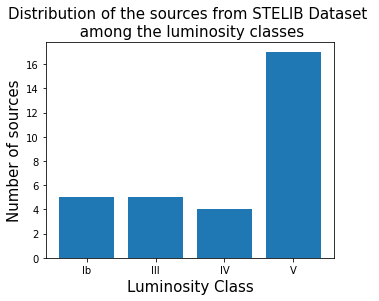

In [3]:
type_data = []
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0,0,1,1])
plot_data = {'Ib':0,'III':0,'IV':0, 'V':0}
for i in list(data.values()):
    try:
        plot_data[i[2:]] += 1
        type_data.append(i[2:])
    except:
        plot_data[i[4:]] += 1
        type_data.append(i[4:])
ax.bar(plot_data.keys(),plot_data.values())
plt.xlabel("Luminosity Class",fontsize=15)
plt.ylabel("Number of sources",fontsize=15)
plt.title("Distribution of the sources from STELIB Dataset \n among the luminosity classes", fontsize=15)
plt.show()
type_data = np.array(type_data)

In [3]:
class_data = []
for i in data.values():
    class_data.append(i[0])
class_data = np.array(class_data)

#type_data = []
#for i in data.values():
#    type_data.append(i[2:])
#type_data = np.array(type_data)

In [4]:
tgm_data = np.array([])
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/tgm_data.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            if(tgm_data.size == 0):
                tgm_data = np.array([float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])])
            else:
                tgm_data = np.row_stack((tgm_data,[float(temp[5]),float(temp[7]),float(temp[9]),float(temp[11]),float(temp[13]),float(temp[15]),float(temp[17]),float(temp[19]),float(temp[21]),float(temp[23]),float(temp[25])]))
        else:
            continue

Text(0.5, 1.0, 'Absolute Magnitude Comparison')

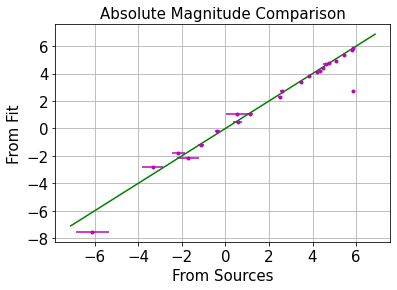

In [33]:
model = [2.29, 4.11, -2.79, -7.55, 4.92, 5.74, -2.17, 1.06, 4.43, 5.87, 2.71, 3.82, 5.36, 4.77, 4.19, 1.07, 4.71, -1.76, -0.21, 0.44, 2.73, 3.41, -1.21]
data =  [2.49, 4.19, -3.35, -6.11, 5.07, 5.81, -1.72, 1.12, 4.46, 5.87, 2.61, 3.82, 5.46, 4.74, 4.32, 0.54, 4.63, -2.16, -0.38, 0.56, 5.87, 3.45, -1.13]
merr = [[0.01,0.015],[0.01,0.003],[0.13,0.14],[0.2,0.2],[0.001,0.001],[0.004,0.006],[0.06,0.05],[0.02,0.02],[0.004,0.006],[0.003,0.007],[0.01,0.01],[0.003,0.007],[0.005,0.005],[0.001,0.001],[0.002,0.008],[0.05,0.05],[0.01,0.01],[0.04,0.05],[0.02,0.02],[0.03,0.03],[0.04,0.04],[0.01,0.005],[0.03,0.03]]
derr = [0.06,0.04,0.5,0.75,0.04,0.05,0.5,0.13,0.04,0.05,0.09,0.05,0.04,0.05,0.04,0.5,0.16,0.3,0.11,0.2,0.05,0.05,0.13]
derr = np.array(derr)
data = np.array(data)
model = np.array(model)
merr= np.array(merr).T
merr[0] *= -1
xmin = np.amin(data); xmax = np.amax(data)
xarr = np.linspace(xmin-1,xmax+1,100)
fs = 15
plt.errorbar(data,model,xerr=derr,yerr=merr, fmt='.m')
plt.grid()
plt.plot(xarr,xarr,'g')
plt.xlabel("From Sources", fontsize=fs)
plt.ylabel("From Fit", fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.title("Absolute Magnitude Comparison", fontsize=fs)

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


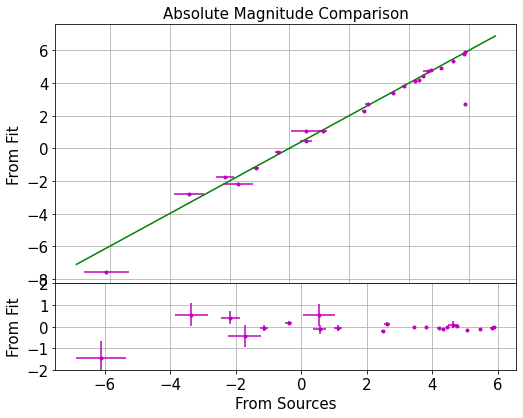

In [38]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
plt.errorbar(data,model,xerr=derr,yerr=merr, fmt='.m')
plt.grid()
plt.plot(xarr,xarr,'g')
plt.xlabel("From Sources", fontsize=fs)
plt.ylabel("From Fit", fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.title("Absolute Magnitude Comparison", fontsize=fs)

frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.errorbar(data,model-data,xerr=derr,yerr=np.sqrt(merr[0]**2 + derr**2), fmt='.m')
plt.grid()
plt.xlabel("From Sources", fontsize=fs)
plt.ylabel("From Fit", fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(-2,2)
fig.tight_layout(pad=0.1)


Text(0.5, 1.0, 'Metallicity')

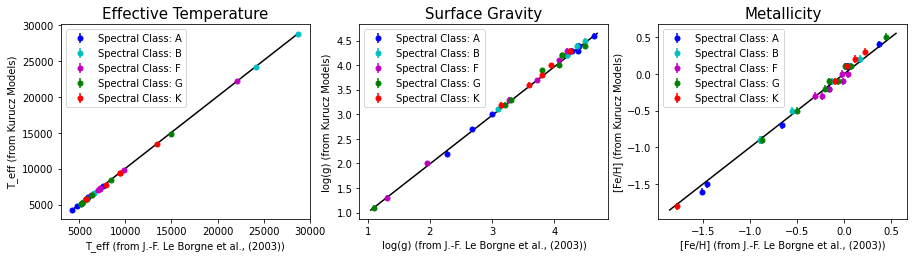

In [6]:
t_f = 15
n_row = 1
n_col = 3
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(tgm_data.T[8])-50, min(tgm_data.T[0])-50]
point2 = [max(tgm_data.T[8])+50, max(tgm_data.T[0])+50]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[8][idx], tgm_data.T[0][idx], yerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("T_eff (from J.-F. Le Borgne et al., (2003))")
plt.ylabel("T_eff (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
point1 = [min(tgm_data.T[9])-0.05, min(tgm_data.T[2])-0.050]
point2 = [max(tgm_data.T[9])+0.05, max(tgm_data.T[2])+0.050]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[9][idx], tgm_data.T[2][idx], yerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("log(g) (from J.-F. Le Borgne et al., (2003))")
plt.ylabel("log(g) (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,3)
p1 = min(min(tgm_data.T[10])-0.05, min(tgm_data.T[4])-0.050)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[10])+0.05, max(tgm_data.T[4])+0.050)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[10][idx], tgm_data.T[4][idx], yerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("[Fe/H] (from J.-F. Le Borgne et al., (2003))")
plt.ylabel("[Fe/H] (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

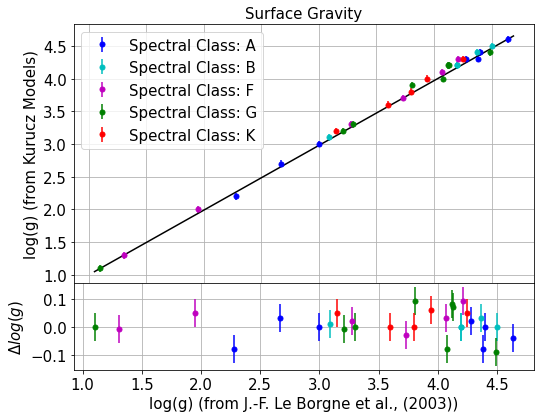

In [14]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(tgm_data.T[9])-0.05, min(tgm_data.T[2])-0.050]
point2 = [max(tgm_data.T[9])+0.05, max(tgm_data.T[2])+0.050]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[9][idx], tgm_data.T[2][idx], yerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlabel("log(g) (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel("log(g) (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Surface Gravity",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[9][idx], tgm_data.T[2][idx]-tgm_data.T[9][idx], yerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlabel("log(g) (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$\Delta log(g)$",fontsize=t_f)
fig.tight_layout(pad=0.1)


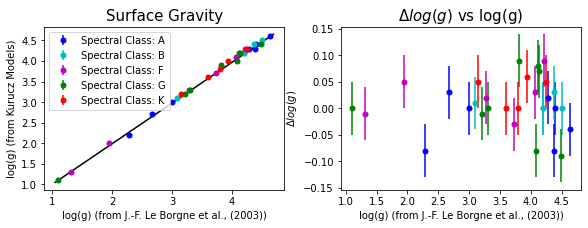

In [285]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(tgm_data.T[9])-0.05, min(tgm_data.T[2])-0.050]
point2 = [max(tgm_data.T[9])+0.05, max(tgm_data.T[2])+0.050]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[9][idx], tgm_data.T[2][idx], yerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("log(g) (from J.-F. Le Borgne et al., (2003))")
plt.ylabel("log(g) (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[9][idx], tgm_data.T[2][idx]-tgm_data.T[9][idx], yerr=tgm_data.T[3][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("log(g) (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$\Delta log(g)$")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs log(g)",fontsize=t_f)
fig.tight_layout(pad=0.1)


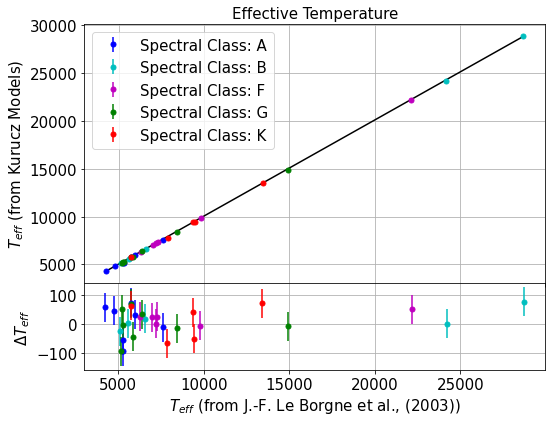

In [15]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(tgm_data.T[8])-50, min(tgm_data.T[0])-50]
point2 = [max(tgm_data.T[8])+50, max(tgm_data.T[0])+50]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[8][idx], tgm_data.T[0][idx], yerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$T_{eff}$ (from Kurucz Models)", fontsize = t_f)

plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Effective Temperature",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[8][idx],tgm_data.T[0][idx]-tgm_data.T[8][idx], yerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = t_f)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = t_f)
fig.tight_layout(pad=0.1)


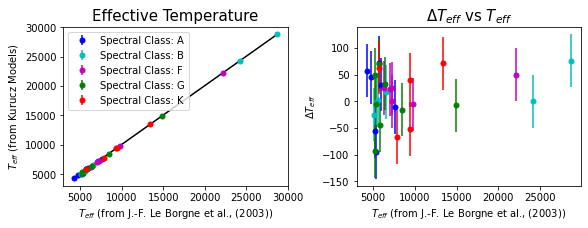

In [289]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(tgm_data.T[8])-50, min(tgm_data.T[0])-50]
point2 = [max(tgm_data.T[8])+50, max(tgm_data.T[0])+50]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[8][idx], tgm_data.T[0][idx], yerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$T_{eff}$ (from Kurucz Models)", fontsize = 10)
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[8][idx],tgm_data.T[0][idx]-tgm_data.T[8][idx], yerr=tgm_data.T[1][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel(r"$T_{eff}$ (from J.-F. Le Borgne et al., (2003))", fontsize = 10)
plt.ylabel(r"$\Delta T_{eff}$", fontsize = 10)
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T_{eff}$",fontsize=t_f)
fig.tight_layout(pad=0.1)

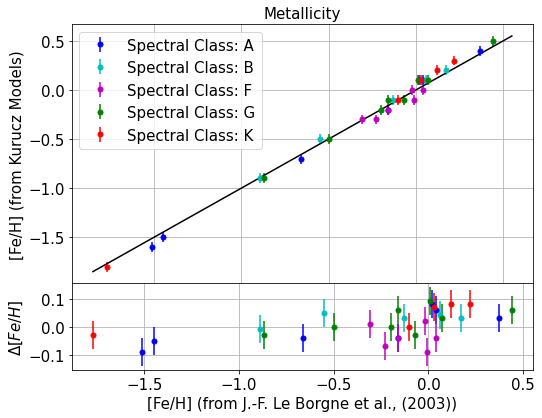

In [18]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(tgm_data.T[10])-0.05, min(tgm_data.T[4])-0.050)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[10])+0.05, max(tgm_data.T[4])+0.050)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[10][idx], tgm_data.T[4][idx], yerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlabel("[Fe/H] (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel("[Fe/H] (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Metallicity",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[10][idx], tgm_data.T[4][idx]-tgm_data.T[10][idx], yerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlabel("[Fe/H] (from J.-F. Le Borgne et al., (2003))",fontsize=t_f)
plt.ylabel(r"$\Delta [Fe/H]$",fontsize=t_f)
fig.tight_layout(pad=0.1)


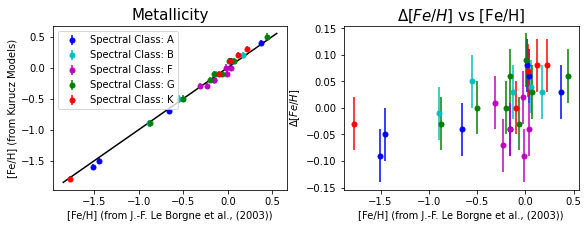

In [297]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(tgm_data.T[10])-0.05, min(tgm_data.T[4])-0.050)
point1 = [p1, p1]
p2 = max(max(tgm_data.T[10])+0.05, max(tgm_data.T[4])+0.050)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[10][idx], tgm_data.T[4][idx], yerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("[Fe/H] (from J.-F. Le Borgne et al., (2003))")
plt.ylabel("[Fe/H] (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    plt.errorbar(tgm_data.T[10][idx], tgm_data.T[4][idx]-tgm_data.T[10][idx], yerr=tgm_data.T[5][idx], fmt=frmt[ctr], markersize = '5', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("[Fe/H] (from J.-F. Le Borgne et al., (2003))")
plt.ylabel(r"$\Delta [Fe/H]$")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs [Fe/H]",fontsize=t_f)
fig.tight_layout(pad=0.1)

In [19]:
ubvri_data = np.zeros((class_data.size,np.arange(3,25,2).size))
ctr = 0
with open(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/ubvri_data.txt") as f:
    for line in f:
        temp = line.split()
        if(len(temp) > 1):
            for i in np.arange(3,25,2):
                if(i != 13):
                    try:
                        ubvri_data[ctr][(i//2) -1] = float(temp[i]) 
                    except:
                        ubvri_data[ctr][(i//2) -1] = 0
                else:
                    continue
        else:
            continue
        ctr += 1
ubvri_data = np.delete(ubvri_data,5,1)

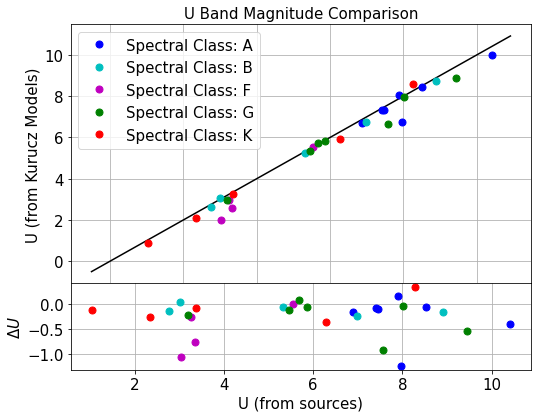

In [29]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[5])-0.5, min(ubvri_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[5])+0.50, max(ubvri_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
plt.grid()
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[5][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("U (from sources)",fontsize=t_f)
plt.ylabel("U (from Kurucz Models)",fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("U Band Magnitude Comparison",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[5][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("U (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta U$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
fig.tight_layout(pad=0.1)


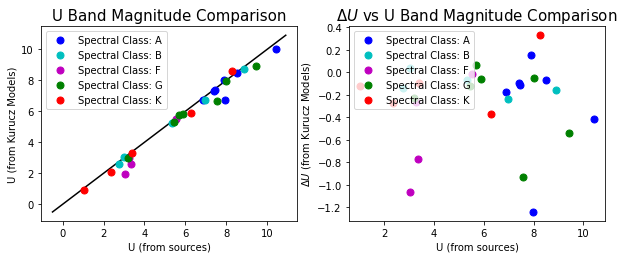

In [299]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[5])-0.5, min(ubvri_data.T[0])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[5])+0.50, max(ubvri_data.T[0])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[5][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("U (from sources)")
plt.ylabel("U (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("U Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[5][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[0][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("U (from sources)")
plt.ylabel(r"$\Delta U$ (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta U$ vs U Band Magnitude Comparison",fontsize=t_f)
plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")


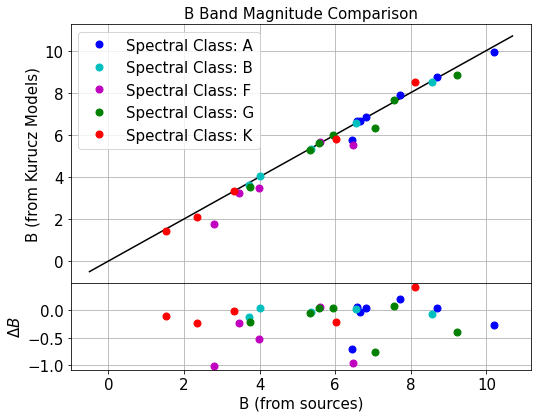

In [35]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[6])-0.5, min(ubvri_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[6])+0.50, max(ubvri_data.T[1])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
plt.grid()
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[6][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel("B (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.xlim(point1[0]-0.5,point2[0]+0.5)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.title("B Band Magnitude Comparison",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[6][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta B$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.xlim(point1[0]-0.5,point2[0]+0.5)
plt.grid()
fig.tight_layout(pad=0.1)


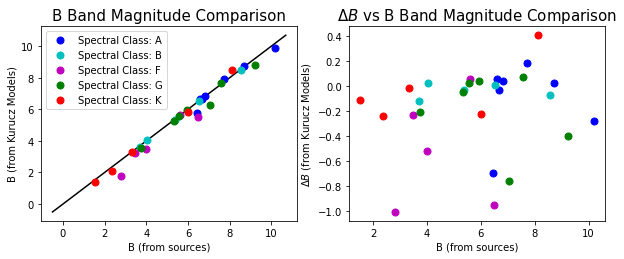

In [300]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[6])-0.5, min(ubvri_data.T[1])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[6])+0.50, max(ubvri_data.T[1])+0.50)
point2 = [p2,p2]

x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[6][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel("B (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("B Band Magnitude Comparison",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[6][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[1][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("B (from sources)")
plt.ylabel(r"$\Delta B$ (from Kurucz Models)")
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta B$ vs B Band Magnitude Comparison",fontsize=t_f)
plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_B_mag_comparison.png")


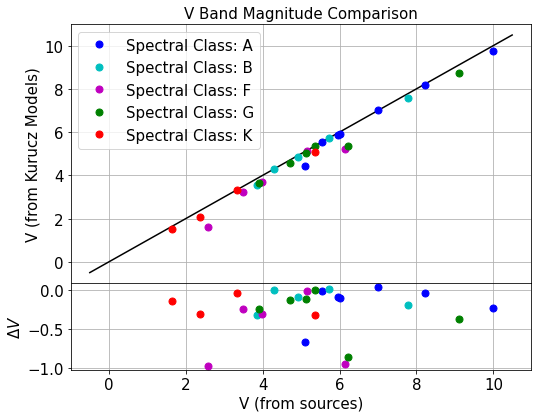

In [39]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[7])-0.5, min(ubvri_data.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[7])+0.50, max(ubvri_data.T[2])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
plt.grid()
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[7][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[2][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)",fontsize=t_f)
plt.ylabel("V (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.xlim(point1[0]-0.5,point2[0]+0.5)
plt.ylim(point1[1]-0.5,point2[1]+0.5)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.title("V Band Magnitude Comparison",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[7][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[2][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta V$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.xlim(point1[0]-0.5,point2[0]+0.5)

plt.grid()
fig.tight_layout(pad=0.1)


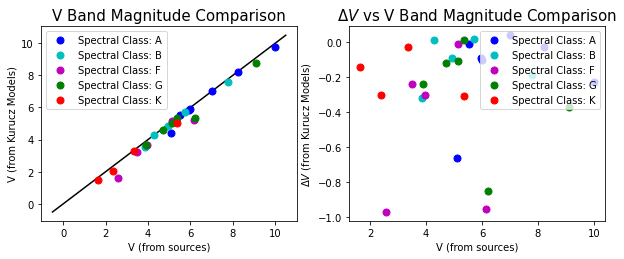

In [301]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[7])-0.5, min(ubvri_data.T[2])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[7])+0.50, max(ubvri_data.T[2])+0.50)
point2 = [p2,p2]

x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[7][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[2][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)")
plt.ylabel("V (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("V Band Magnitude Comparison",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[7][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[2][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("V (from sources)")
plt.ylabel(r"$\Delta V$ (from Kurucz Models)")
plt.legend(loc ='upper right')   
plt.title(r"$\Delta V$ vs V Band Magnitude Comparison",fontsize=t_f)
plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_V_mag_comparison.png")



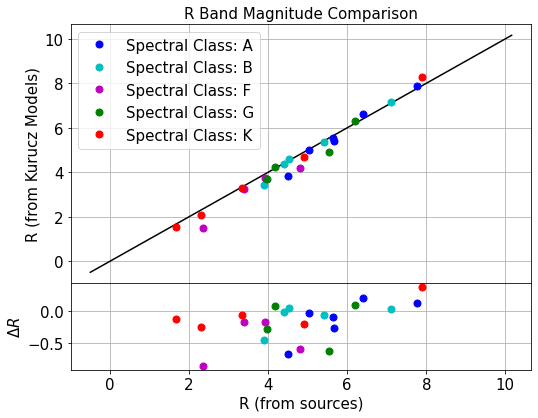

In [38]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[8])-0.5, min(ubvri_data.T[3])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[8])+0.50, max(ubvri_data.T[3])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
plt.grid()
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[8][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[3][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("R (from sources)",fontsize=t_f)
plt.ylabel("R (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.xlim(point1[0]-0.5,point2[0]+0.5)
plt.ylim(point1[1]-0.5,point2[1]+0.5)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.title("R Band Magnitude Comparison",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[8][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[3][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("R (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta R$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.xlim(point1[0]-0.5,point2[0]+0.5)

plt.grid()
fig.tight_layout(pad=0.1)


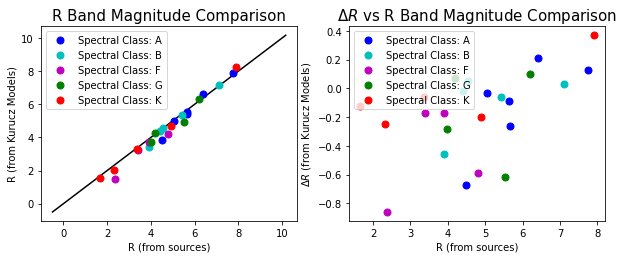

In [302]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[8])-0.5, min(ubvri_data.T[3])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[8])+0.50, max(ubvri_data.T[3])+0.50)
point2 = [p2,p2]

x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[8][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[3][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("R (from sources)")
plt.ylabel("R (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("R Band Magnitude Comparison",fontsize=t_f)
#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_R_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[8][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[3][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("R (from sources)")
plt.ylabel(r"$\Delta R$ (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta R$ vs R Band Magnitude Comparison",fontsize=t_f)
plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_R_mag_comparison.png")


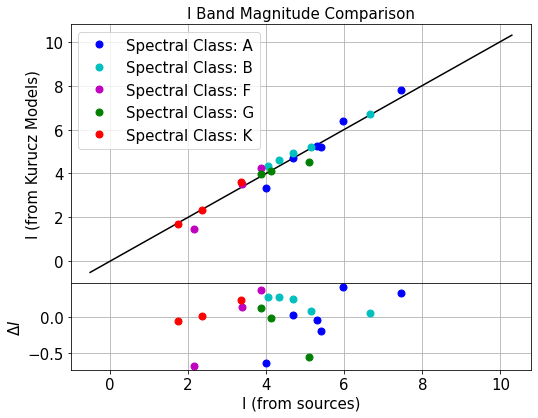

In [40]:
t_f = 15
n_row = 1
n_col = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
p1 = min(min(ubvri_data.T[9])-0.5, min(ubvri_data.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[9])+0.50, max(ubvri_data.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt.plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
plt.grid()
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[9][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[4][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("I (from sources)",fontsize=t_f)
plt.ylabel("I (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.xlim(point1[0]-0.5,point2[0]+0.5)
plt.ylim(point1[1]-0.5,point2[1]+0.5)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.title("I Band Magnitude Comparison",fontsize=t_f)

frame2=fig1.add_axes((.1,.1,.8,.2))        
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[9][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[4][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("I (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta I$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.xlim(point1[0]-0.5,point2[0]+0.5)

plt.grid()
fig.tight_layout(pad=0.1)


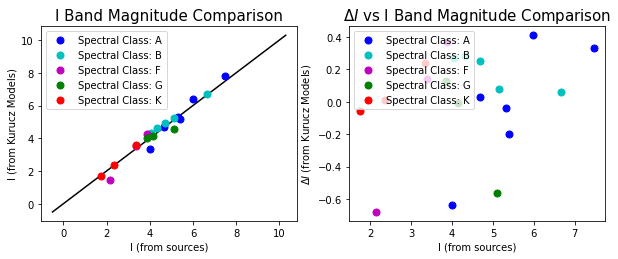

In [303]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(ubvri_data.T[9])-0.5, min(ubvri_data.T[4])-0.50)
point1 = [p1, p1]
p2 = max(max(ubvri_data.T[9])+0.50, max(ubvri_data.T[4])+0.50)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')
frmt = ['ob','oc','om','og','or']
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[9][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[4][idx]
    plt.errorbar(x[xidx],y[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("I (from sources)")
plt.ylabel("I (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("I Band Magnitude Comparison",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
ctr = 0
classes = np.unique(class_data)
for i in classes:
    idx = np.where(class_data == i)
    x = ubvri_data.T[9][idx]
    xidx = np.where(x != 0)
    y = ubvri_data.T[4][idx]
    plt.errorbar(x[xidx],y[xidx]-x[xidx],fmt=frmt[ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    ctr += 1
plt.xlabel("I (from sources)")
plt.ylabel(r"$\Delta I$ (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta I$ vs I Band Magnitude Comparison",fontsize=t_f)
plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_I_mag_comparison.png")


In [230]:
n_dict = {"B": 0,"A": 0,"F": 0,"G": 0,"K": 0}
classes, counts = np.unique(class_data, return_counts = True)
ctr = 0
for i in range(len(classes)):
    n_dict[classes[i]] = counts[i]


In [231]:
bands = np.array(["U","B","V","R","I"])
chi_matrix = np.zeros((classes.size, bands.size))
p_value_matrix = np.zeros((classes.size, bands.size))
for i in range(classes.size):
    for j in range(bands.size):
        idx = np.where(class_data == classes[i])
        x = ubvri_data.T[j+5][idx]
        xidx = np.where(x != 0)
        y = ubvri_data.T[j][idx]
        chi_matrix[i][j], p_value_matrix[i][j] = chisquare(x[xidx], f_exp=y[xidx])


In [232]:
p_df = pd.DataFrame(data=p_value_matrix,index=classes,columns=bands)  # 1st row as the column names
chi_df = pd.DataFrame(data=chi_matrix,index=classes,columns=bands)  # 1st row as the column names

In [233]:
p_df

,U,B,V,R,I
A,0.999683,0.999981,0.999975,0.999626,0.999400
B,0.999948,0.999997,0.999844,0.999512,0.999713
F,0.844485,0.933751,0.938368,0.898164,0.838476
G,0.999876,0.999962,0.999390,0.991570,0.963997
K,0.999035,0.999499,0.994582,0.999470,0.990939


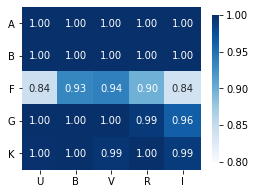

In [234]:
fig, ax = plt.subplots(figsize=(4, 3))# mask
corr = p_df.iloc[:,:].copy()# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=0.8, vmax=1, cbar_kws={"shrink": .9})# yticks
plt.yticks(rotation=0)
plt.show()

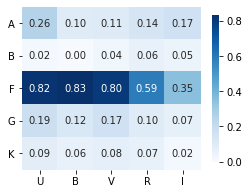

In [235]:
fig, ax = plt.subplots(figsize=(4, 3))# mask
corr = chi_df.iloc[:,:].copy()# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=0, vmax=np.amax(chi_matrix), cbar_kws={"shrink": .9})# yticks
plt.yticks(rotation=0)
plt.show()

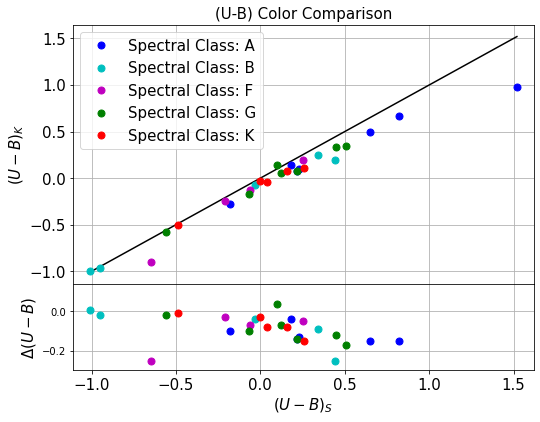

In [80]:
p1 = np.inf
p2 = -np.inf

t_f = 15
n_row = 1
n_col = 2
ctr = 0
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(U-B)_S$",fontsize=t_f)
plt.ylabel(r"$(U-B)_K$",fontsize=t_f)
plt.grid()
plt.xlim(p1-0.1,p2+0.1)
plt.yticks(fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(U-B) Color Comparison",fontsize=t_f)

ctr = 1
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.xlim(p1-0.1,p2+0.1)
p1 = np.inf
p2 = -np.inf
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(U-B)_S$",fontsize=t_f)
plt.ylabel(r"$\Delta (U-B)$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.ylim([p1-0.15,p2+0.15])
plt.grid()
#plt.legend(loc ='upper left')   
fig.tight_layout(pad=0.1)

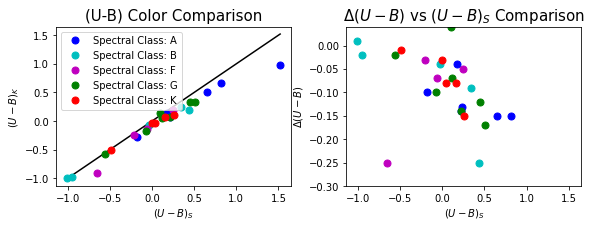

In [236]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 0
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(U-B)_S$")
plt.ylabel(r"$(U-B)_K$")
plt.legend(loc ='upper left')   
plt.title("(U-B) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(U-B)_S$")
plt.ylabel(r"$\Delta (U-B)$")
plt.ylim([p1-0.15,p2+0.05])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(U-B)$ vs $(U-B)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


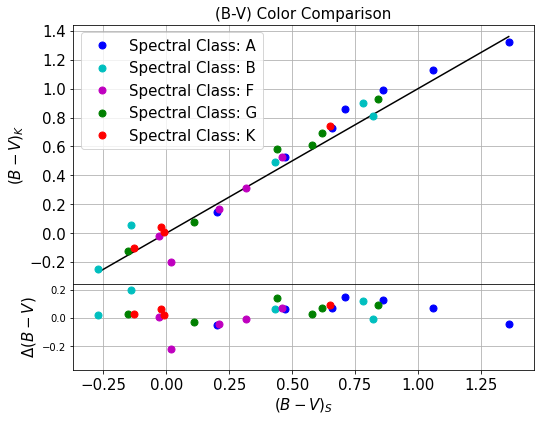

In [81]:
p1 = np.inf
p2 = -np.inf

t_f = 15
n_row = 1
n_col = 2
ctr = 1
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_S$",fontsize=t_f)
plt.ylabel(r"$(B-V)_K$",fontsize=t_f)
plt.grid()
plt.xlim(p1-0.1,p2+0.1)
plt.yticks(fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(B-V) Color Comparison",fontsize=t_f)

ctr = 1
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.xlim(p1-0.1,p2+0.1)
p1 = np.inf
p2 = -np.inf
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_S$",fontsize=t_f)
plt.ylabel(r"$\Delta (B-V)$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.ylim([p1-0.15,p2+0.15])
plt.grid()
#plt.legend(loc ='upper left')   
fig.tight_layout(pad=0.1)

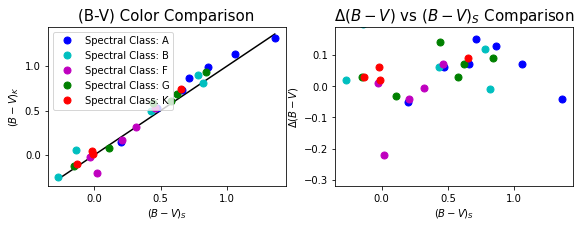

In [237]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 1
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(B-V)_S$")
plt.ylabel(r"$(B-V)_K$")
plt.legend(loc ='upper left')   
plt.title("(B-V) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(B-V)_S$")
plt.ylabel(r"$\Delta (B-V)$")
plt.ylim([p1-0.1,p2+0.1])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(B-V)$ vs $(B-V)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


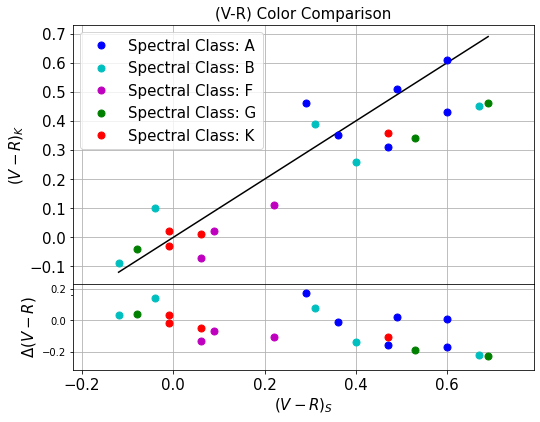

In [66]:
p1 = np.inf
p2 = -np.inf

t_f = 15
n_row = 1
n_col = 2
ctr = 2
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.ylabel(r"$(V-R)_K$",fontsize=t_f)
plt.grid()
plt.xlim(p1-0.1,p2+0.1)
plt.yticks(fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(V-R) Color Comparison",fontsize=t_f)

ctr = 2
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.xlim(p1-0.1,p2+0.1)
p1 = np.inf
p2 = -np.inf
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(V-R)_S$",fontsize=t_f)
plt.ylabel(r"$\Delta (V-R)$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.ylim([p1-0.15,p2+0.2])
plt.grid()
#plt.legend(loc ='upper left')   
fig.tight_layout(pad=0.1)

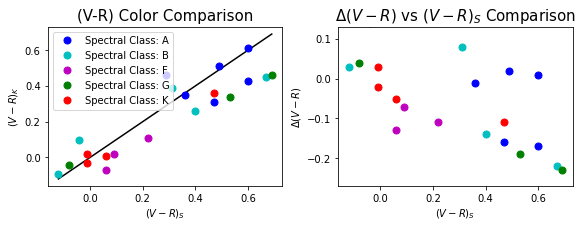

In [238]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 2
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(V-R)_S$")
plt.ylabel(r"$(V-R)_K$")
plt.legend(loc ='upper left')   
plt.title("(V-R) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(V-R)_S$")
plt.ylabel(r"$\Delta (V-R)$")
plt.ylim([p1-0.1,p2+0.1])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(V-R)$ vs $(V-R)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


[-0.3800000000000002, -0.9900000000000001] [0.5900000000000002, 0.5599999999999999]


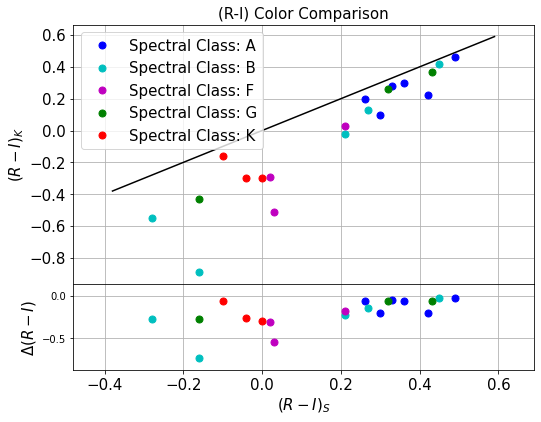

In [79]:
#p1 = np.inf
#p2 = -np.inf

t_f = 15
n_row = 1
n_col = 2
ctr = 3
fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
point1 = [np.inf,np.inf]
point2 = [-np.inf,-np.inf]
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(_x) < point1[0]):
        point1[0] = min(_x)
    if(max(_x) > point2[0]):
        point2[0] = max(_x)
    if(min(_y) < point1[1]):
        point1[1] = min(_y)
    if(max(_y) > point2[1]):
        point2[1] = max(_y)
#    if(min(min(_x),min(_y)) < p1):
#        p1 = min(min(_x),min(_y))
#    if(max(max(_x),max(_y)) > p2):
#        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
point1[0] -= 0.1
point1[1] -= 0.1
point2[0] += 0.1
point2[1] += 0.1
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[0], point2[0]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.ylabel(r"$(R-I)_K$",fontsize=t_f)
plt.grid()
plt.xlim(point1[0]-0.1,point2[0]+0.1)
plt.yticks(fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("(R-I) Color Comparison",fontsize=t_f)

ctr = 3
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.xlim(point1[0]-0.1,point2[0]+0.1)
p1 = np.inf
p2 = -np.inf
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(R-I)_S$",fontsize=t_f)
plt.ylabel(r"$\Delta (R-I)$",fontsize=t_f)
plt.xticks(fontsize=t_f)
plt.ylim([p1-0.15,p2+0.2])
plt.grid()
#plt.legend(loc ='upper left')   
fig.tight_layout(pad=0.1)

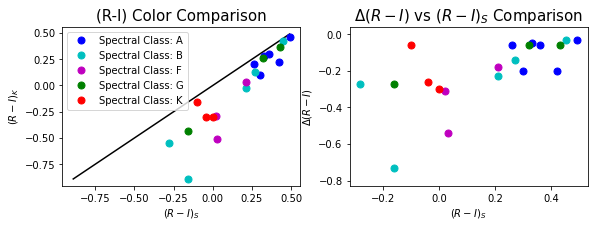

In [239]:
p1 = np.inf
p2 = -np.inf
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
ctr = 3
ax = fig.add_subplot(n_row,n_col,1)
idx = np.where(np.logical_and(ubvri_data.T[ctr+5]!=0, ubvri_data.T[ctr+1+5]!=0))
x = ubvri_data.T[ctr+5][idx]-ubvri_data.T[ctr+1+5][idx]
y = ubvri_data.T[ctr][idx]-ubvri_data.T[ctr+1][idx]

frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(min(_x),min(_y))
    if(max(max(_x),max(_y)) > p2):
        p2 = max(max(_x),max(_y))
    plt.errorbar(_x,_y,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1

point1 = [p1,p1]
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values,color='k')

plt.xlabel(r"$(R-I)_S$")
plt.ylabel(r"$(R-I)_K$")
plt.legend(loc ='upper left')   
plt.title("(R-I) Color Comparison",fontsize=t_f)

p1 = np.inf
p2 = -np.inf
ctr = 1
ax = fig.add_subplot(n_row,n_col,2)
frmt = ['ob','oc','om','og','or']
class_ctr = 0
classes = np.unique(class_data)
for i in classes:
    _idx = np.where(class_data[idx] == i)
    _x = x[_idx]
    _y = y[_idx]
    if(min(min(_x),min(_y)) < p1):
        p1 = min(_y-_x)
    if(min(max(_x),max(_y)) > p2):
        p2 = max(_y-_x)
    plt.errorbar(_x,_y-_x,fmt=frmt[class_ctr], markersize = '7', label='Spectral Class: {}'.format(i))
    class_ctr += 1
plt.xlabel(r"$(R-I)_S$")
plt.ylabel(r"$\Delta (R-I)$")
plt.ylim([p1-0.1,p2+0.1])
#plt.legend(loc ='upper left')   
plt.title(r"$\Delta(R-I)$ vs $(R-I)_S$ Comparison",fontsize=t_f)
fig.tight_layout(pad=0.1)


In [268]:
bands = np.array(["U","B","V","R","I"])
types = np.unique(type_data)
chi_matrix = np.zeros((types.size, bands.size))
p_value_matrix = np.zeros((types.size, bands.size))
for i in range(types.size):
    for j in range(bands.size):
        idx = np.where(type_data == types[i])
        x = ubvri_data.T[j+5][idx]
        xidx = np.where(x != 0)
        y = ubvri_data.T[j][idx]
        chi_matrix[i][j], p_value_matrix[i][j] = chisquare(x[xidx], f_exp=y[xidx])


In [270]:
type_p_df = pd.DataFrame(data=p_value_matrix,index=types,columns=bands)  # 1st row as the column names
type_chi_df = pd.DataFrame(data=chi_matrix,index=types,columns=bands)  # 1st row as the column names

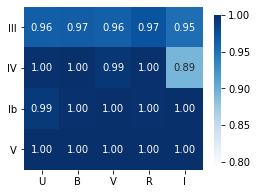

In [271]:
fig, ax = plt.subplots(figsize=(4, 3))# mask
corr = type_p_df.iloc[:,:].copy()# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=0.8, vmax=1, cbar_kws={"shrink": .9})# yticks
plt.yticks(rotation=0)
plt.show()

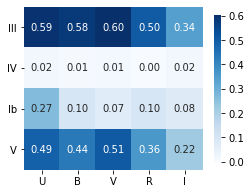

In [272]:
fig, ax = plt.subplots(figsize=(4, 3))# mask
corr = type_chi_df.iloc[:,:].copy()# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=0, vmax=np.amax(chi_matrix), cbar_kws={"shrink": .9})# yticks
plt.yticks(rotation=0)
plt.show()